Importing and cleaning data. We are dropping all non-criminal listings as well as offenses with under 300 occurances, as many of these either involve little to no threat to the general public or occur in extremely minimal numbers. The category of 'other offenses' was also dropped as it encompasses such a wide array of descriptions and poses difficulty in properly categorizing.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvpath = "Resources/sfpd_incidents_2016.csv"
sfpd_df = pd.read_csv(csvpath)
sfpd_clean = sfpd_df[~sfpd_df['Category'].isin(['NON-CRIMINAL', 'OTHER OFFENSES','SECONDARY CODES','WARRANTS','SUICIDE','BRIBERY','EXTORTION','EXTORTION','FAMILY OFFENSES','LOITERING','SEX OFFENSES', 'NON FORCIBLE','BAD CHECKS','GAMBLING','PORNOGRAPHY/OBSCENE MAT','TREA'])]
sfpd_clean = sfpd_clean.dropna(how='any')
sfpd_clean = sfpd_clean.drop(['PdId'], axis = 1)
sfpd_clean["Month"] = sfpd_clean["Date"].str.rstrip('/').str.split('/').str[0]
sfpd_clean

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",01
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",01
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",01
9,160003641,MISSING PERSON,FOUND PERSON,Friday,01/01/2016 12:00:00 AM,10:06,BAYVIEW,NONE,100 Block of CAMERON WY,-122.387182,37.720967,"(37.7209669615499, -122.387181635995)",01
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150492,160823994,ASSAULT,BATTERY,Sunday,10/09/2016 12:00:00 AM,21:15,MISSION,NONE,18TH ST / MISSION ST,-122.419360,37.761836,"(37.7618358012376, -122.419360352761)",10
150493,160858327,ASSAULT,BATTERY,Friday,10/21/2016 12:00:00 AM,13:30,MISSION,NONE,3400 Block of 18TH ST,-122.419749,37.761867,"(37.7618672648972, -122.419748993977)",10
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",12
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",12


We want to visualize how many offenses are recorded per month for the entirety of 2016:

In [11]:
month_data = sfpd_clean[['Month','Category']]
month_datagrouped = month_data.groupby(['Month']).count()
month_datagrouped = month_datagrouped.sort_values('Category', ascending=False)

Text(0.5, 1.0, 'Recorded Offenses per Month')

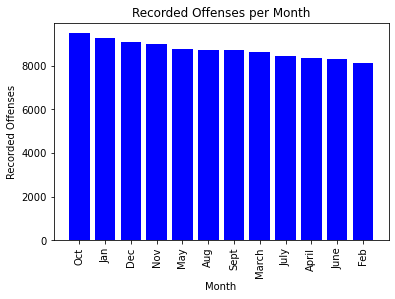

In [13]:
crime = month_datagrouped['Category']
month = ['Oct','Jan','Dec','Nov','May','Aug','Sept','March','July','April','June','Feb']
x = np.arange(len(month))
plt.bar(x, crime, color="b", align="center")
tick_locations = [value for value in x]
plt.xticks(tick_locations, month, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Recorded Offenses')
plt.title('Recorded Offenses per Month')

Visualizing how criminal offenses are distributed by weekday:

In [15]:
day_data = sfpd_clean[['DayOfWeek','Category']]
day_datagroup = day_data.groupby(['DayOfWeek']).count()
day_datagroup = day_datagroup.sort_values('Category', ascending=False)

Text(0.5, 1.0, 'Recorded Offenses per Day of the Week')

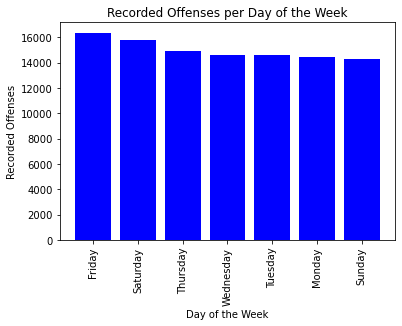

In [16]:
crime = day_datagroup['Category']
day = ['Friday','Saturday','Thursday','Wednesday','Tuesday','Monday','Sunday']
x_axis = np.arange(len(day))
plt.bar(x_axis, crime, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, day, rotation='vertical')
plt.xlabel('Day of the Week')
plt.ylabel('Recorded Offenses')
plt.title('Recorded Offenses per Day of the Week')


How many incidents involve more than one offense? To avoid inflating representation of criminal activity as we analyze further, we find how many incidents involve more than one offense:

In [17]:
incident_df = sfpd_clean[['IncidntNum', 'Category']]
groupedincidents = incident_df.groupby(['IncidntNum']).count()
multoffense = groupedincidents.loc[groupedincidents['Category']>1]
multoffense['Category'].count()

13630